In [56]:
# Data Analytics Library
import pandas as pd
import numpy as np

# Data Visualization Libraries 
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv(r"C:\UM\Y2S2\WIH 3004 TREND IN DS\Assignment\Group Assignment\cleaned_promotion_train.csv.csv")

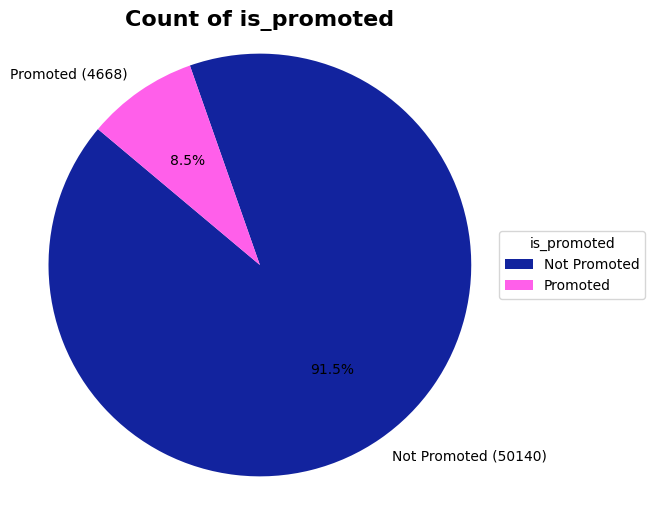

In [58]:
# Replace 0 with 'Not Promoted' and 1 with 'Promoted'
df['is_promoted'] = df['is_promoted'].replace({0: 'Not Promoted', 1: 'Promoted'})

# Count the number of promoted and non-promoted employees
promoted_counts = df['is_promoted'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(promoted_counts, 
        labels=[f'{label} ({count})' for label, count in zip(promoted_counts.index, promoted_counts)], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#12239e', '#ff5fea'])
plt.title('Count of is_promoted', fontsize=16, fontweight='bold')
plt.axis('equal')

# Adding the labels beside the figure
plt.legend(promoted_counts.index, title="is_promoted", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()


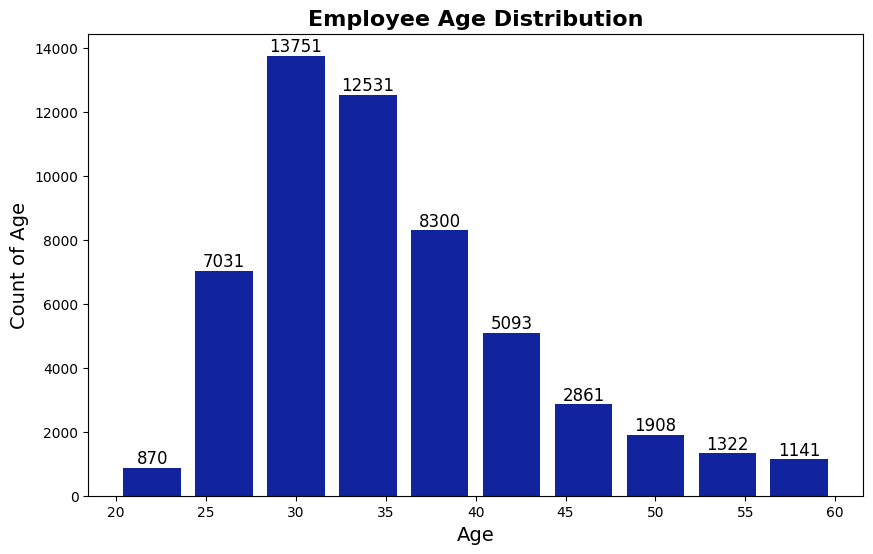

In [59]:
# Plot a histogram for the "age" column with 10 bins
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['age'], bins=10, color='#12239e',rwidth=0.8)

# Add titles and labels
plt.title('Employee Age Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count of Age', fontsize=14)

# Add count labels to each bin
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), 
             str(int(n[i])), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()

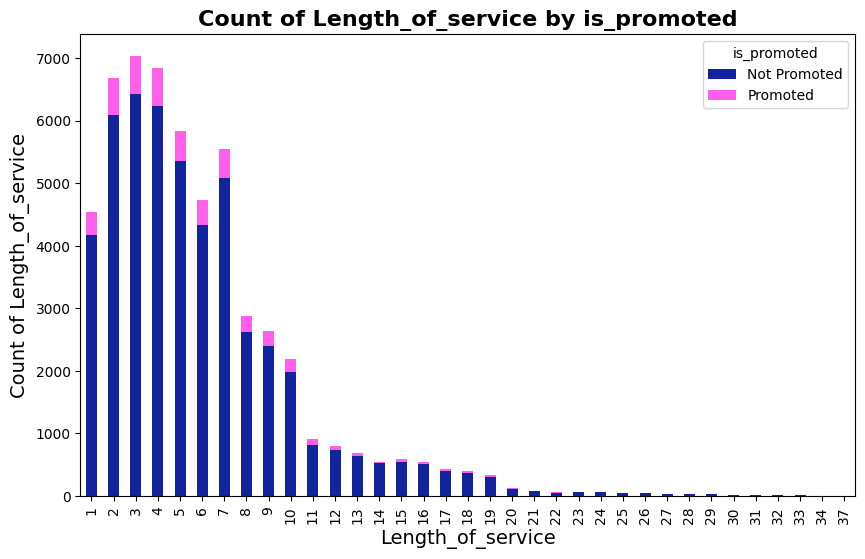

In [60]:
# Group the data by length_of_service and is_promoted, and count the occurrences
grouped_los = df.groupby(['length_of_service', 'is_promoted']).size().unstack(fill_value=0)

# Plot a stacked bar chart
ax = grouped_los.plot(kind='bar', stacked=True, color=['#12239e', '#ff5fea'], figsize=(10, 6))

# Add titles and labels
plt.title('Count of Length_of_service by is_promoted', fontsize=16, fontweight='bold')
plt.xlabel('Length_of_service', fontsize=14)
plt.ylabel('Count of Length_of_service', fontsize=14)

# Add legend
plt.legend(title='is_promoted')

# Show plot
plt.show()

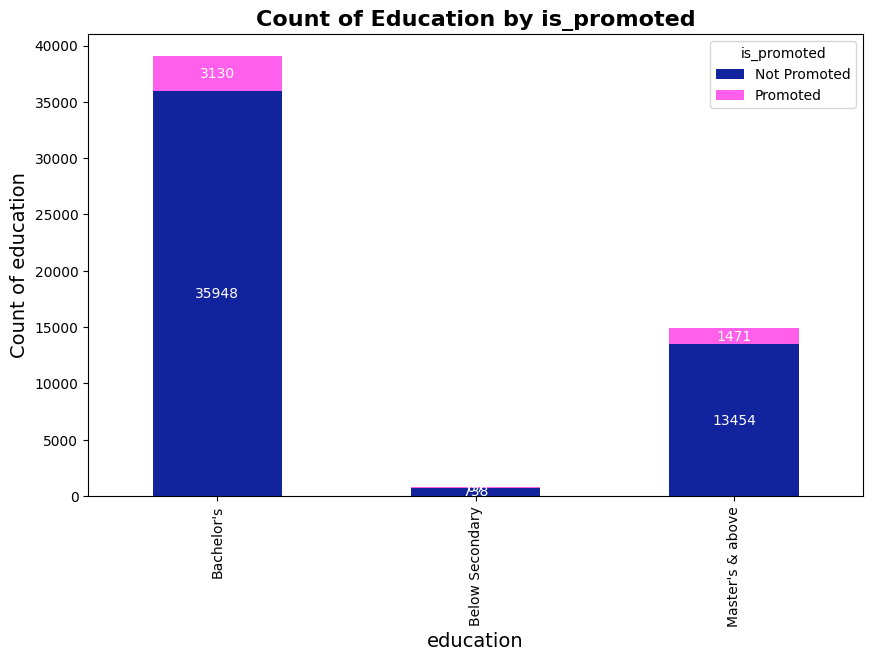

In [61]:
# Group the data by education and is_promoted, and count the occurrences
grouped_education = df.groupby(['education', 'is_promoted']).size().unstack(fill_value=0)

# Plot a stacked bar chart
ax = grouped_education.plot(kind='bar', stacked=True, color=['#12239e', '#ff5fea'], figsize=(10, 6))

# Add titles and labels
plt.title('Count of Education by is_promoted', fontsize=16, fontweight='bold')
plt.xlabel('education', fontsize=14)
plt.ylabel('Count of education', fontsize=14)


for bars in ax.containers:
    ax.bar_label(bars, label_type='center', color='white', fontsize=10)
    
# Add legend
plt.legend(title='is_promoted')

# Show plot
plt.show()

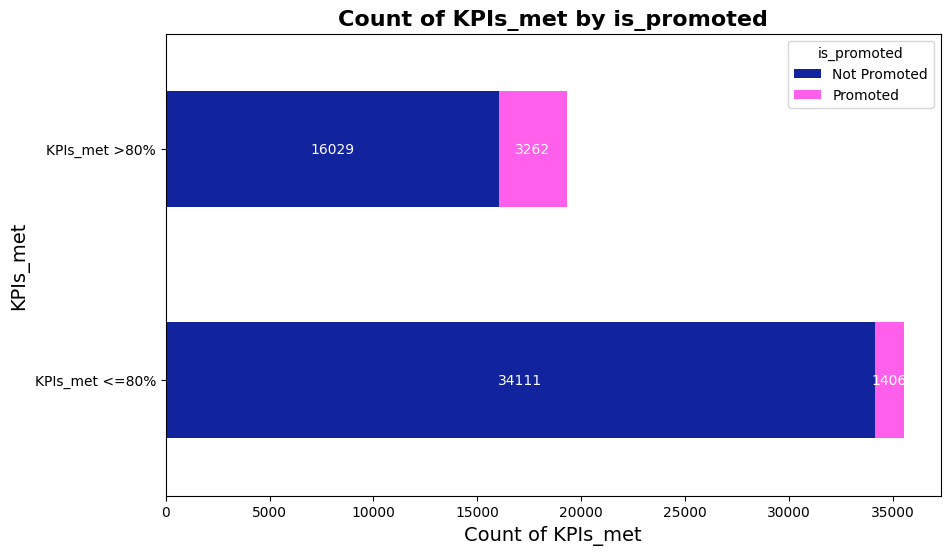

In [62]:
df['KPIs_met >80%'] = df['KPIs_met >80%'].replace({0: 'KPIs_met <=80%', 1: 'KPIs_met >80%'})

# Group the data by 'KPIs_met >80%' and 'is_promoted', and count the occurrences
grouped_KPI = df.groupby(['KPIs_met >80%', 'is_promoted']).size().unstack(fill_value=0)

# Plot a horizontal stacked bar chart
ax = grouped_KPI.plot(kind='barh', stacked=True, color=['#12239e', '#ff5fea'], figsize=(10, 6))

# Add titles and labels
plt.title('Count of KPIs_met by is_promoted', fontsize=16, fontweight='bold')
plt.xlabel('Count of KPIs_met', fontsize=14)
plt.ylabel('KPIs_met', fontsize=14)

for bars in ax.containers:
    ax.bar_label(bars, label_type='center', color='white', fontsize=10)
    
# Add legend
plt.legend(title='is_promoted')

# Show plot
plt.show()

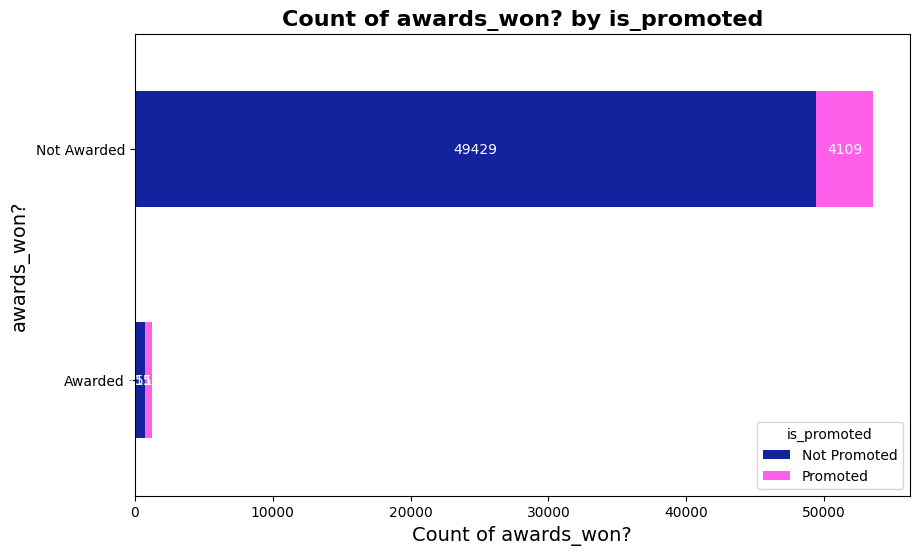

In [63]:
df['awards_won?'] = df['awards_won?'].replace({0: 'Not Awarded', 1: 'Awarded'})

# Group the data by 'awards_won?' and 'is_promoted', and count the occurrences
grouped_awards = df.groupby(['awards_won?', 'is_promoted']).size().unstack(fill_value=0)

# Plot a horizontal stacked bar chart
ax = grouped_awards.plot(kind='barh', stacked=True, color=['#12239e', '#ff5fea'], figsize=(10, 6))

# Add titles and labels
plt.title('Count of awards_won? by is_promoted', fontsize=16, fontweight='bold')
plt.xlabel('Count of awards_won?', fontsize=14)
plt.ylabel('awards_won?', fontsize=14)

# Add count labels inside the bars
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', color='white', fontsize=10)

# Add legend
plt.legend(title='is_promoted')

# Show plot
plt.show()

KeyError: ''

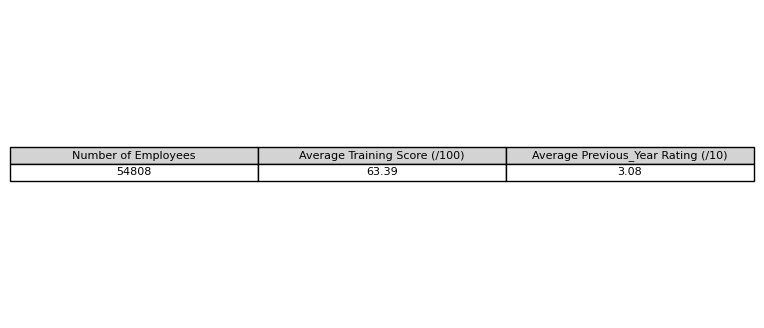

In [68]:
# Get the count of employee_id
count_employee_id = len(df)

# Calculate the average of avg_training_score and previous_year_rating
avg_avg_training_score = round(df['avg_training_score'].mean(), 2)
avg_previous_year_rating = round(df['previous_year_rating'].mean(), 2)

# Create a horizontal figure table
fig, ax = plt.subplots(figsize=(8, 4))

# Hide axes
ax.axis('off')

# Create the table
table_data = [
    ['Number of Employees', 'Average Training Score (/100)', 'Average Previous_Year Rating (/10)'],
    [count_employee_id, avg_avg_training_score, avg_previous_year_rating]
]

# Adding borders manually to each cell
cell_colors = [['lightgray'] * len(table_data[0]) for _ in range(len(table_data))]
cell_colors[0] = ['lightgray', 'lightgray', 'lightgray'] 
cell_colors[1] = ['white', 'white', 'white'] 

table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.4, 0.4, 0.4], cellColours=cell_colors)

# Adding borders
for i, cell in enumerate(table.properties()[""]):
    cell.set_edgecolor('black')
    if i == 0:
        # Header row
        cell.set_fontsize(12)
        cell.set_fontweight('bold')
    else:
        # Data rows
        cell.set_fontsize(12)

plt.show()